<a href="https://colab.research.google.com/github/thatgirldorian/Salary-Prediction-Analysis/blob/master/Salaries_%26_Job_Postings_An_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Salaries & Job Postings: An Exploratory Data Analysis.ipynb**

My aim in this project is to analyze salaries based on diverse job descriptions. 

Here, I'll examine a set of job postings with salaries and then look at the relationship bwtween them and a set of job postings.

I have 3 CSV data files:

• train_features.csv: Each row represents metadata for an individual job posting.
The “jobId” column represents a unique identifier for the job posting. The remaining columns describe features of the job posting.

• train_salaries.csv: Each row associates a “jobId” with a “salary”.

• test_features.csv: Similar to train_features.csv, each row represents metadata for an individual job posting.
The first row of each file contains headers for the columns. The metadata and salary data may contain errors.

This analysis aims to provide an insight into the relationship that exists job postings and the salaries they pay.


**Exploring the Data**

Here, I'll load, explore, and visualize the salary datasets.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

**Loading the Data**

In [0]:
# Read in files and print the information
train_feature_df = pd.read_csv('train_features.csv')
train_target_df = pd.read_csv('train_salaries.csv')
test_feature_df = pd.read_csv('test_features.csv')

**Examine the data**

Here, I'll take 10 samples from each data set to see at a glance, what I'm dealing with.

In [0]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2.0,31.0
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23.0,24.0
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9.0,70.0
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1.0,54.0
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17.0,68.0


In [0]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22.0,73.0
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20.0,47.0
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17.0,9.0
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14.0,96.0
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10.0,44.0
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6.0,23.0
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6.0,32.0
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9.0,73.0
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6.0,78.0
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23.0,97.0


In [0]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407689,137.0
3,JOB1362684407690,142.0
4,JOB1362684407691,163.0
5,JOB1362684407692,113.0
6,JOB1362684407693,178.0
7,JOB1362684407694,73.0
8,JOB1362684407695,31.0
9,JOB1362684407696,104.0


**Use .info() to see length and dtypes**

Here, I want to see the length and different data types in the data sets.

In [0]:
train_feature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322019 entries, 0 to 322018
Data columns (total 8 columns):
jobId                  322019 non-null object
companyId              322019 non-null object
jobType                322019 non-null object
degree                 322018 non-null object
major                  322018 non-null object
industry               322018 non-null object
yearsExperience        322018 non-null float64
milesFromMetropolis    322018 non-null float64
dtypes: float64(2), object(6)
memory usage: 19.7+ MB


In [0]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914168 entries, 0 to 914167
Data columns (total 2 columns):
jobId     914168 non-null object
salary    914167 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.9+ MB


In [0]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357732 entries, 0 to 357731
Data columns (total 8 columns):
jobId                  357732 non-null object
companyId              357732 non-null object
jobType                357732 non-null object
degree                 357732 non-null object
major                  357732 non-null object
industry               357731 non-null object
yearsExperience        357731 non-null float64
milesFromMetropolis    357731 non-null float64
dtypes: float64(2), object(6)
memory usage: 21.8+ MB


**Check for duplicates**

Here, I'll check and remove any duplicate data. 

In [0]:
train_feature_df.duplicated().sum()

0

In [0]:
train_target_df.duplicated().sum()

0

In [0]:
test_feature_df.duplicated().sum()

0

From these, it's
clear that there are no duplicate data, so I'll keep exploring.

**Identify numerical and categorical variables**

This shows all the columns present in this data set.

In [0]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [0]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

In [0]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

Group numerical and categorical variables separately

In [0]:
train_feature_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,322018.000000,322018.000000
mean,11.982343,49.475924
std,7.209082,28.888187
min,0.000000,0.000000
25%,6.000000,24.000000
50%,12.000000,49.000000
75%,18.000000,74.000000
max,24.000000,99.000000


In [0]:
train_feature_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,322019,322019,322019,322018,322018,322018
unique,322019,63,9,5,9,7
top,JOB1362684728673,COMP44,VICE_PRESIDENT,NONE,NONE,FINANCE
freq,1,5238,40489,76776,171787,46158


**Merge features and targets into a single dataframe(df)**

In [0]:
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [0]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,101.0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10.0,38.0,137.0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8.0,17.0,142.0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8.0,16.0,163.0


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322019 entries, 0 to 322018
Data columns (total 9 columns):
jobId                  322019 non-null object
companyId              322019 non-null object
jobType                322019 non-null object
degree                 322018 non-null object
major                  322018 non-null object
industry               322018 non-null object
yearsExperience        322018 non-null float64
milesFromMetropolis    322018 non-null float64
salary                 322019 non-null float64
dtypes: float64(3), object(6)
memory usage: 24.6+ MB


**Visualizing target variable (salary)**

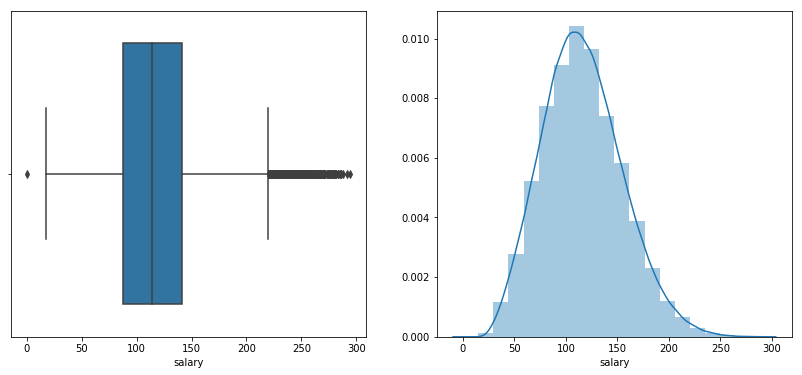

In [0]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

**Using the IQR(Interquartile) rule to identify any potential outliers**



In [0]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    322019.000000
mean        116.067561
std          38.773212
min           0.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         294.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


**Examining potential outliers**

Here, I want to see if there are values that fall outside of the overall pattern of our data.

In [0]:
#checking for any potential outlier below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11.0,7.0,0.0


In [0]:
#checking for any potential outlier above upper bound
train_df[(train_df.salary > 222.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23.0,60.0,223.0
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24.0,3.0,223.0
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22.0,7.0,248.0
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23.0,9.0,240.0
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21.0,14.0,225.0
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23.0,11.0,247.0
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24.0,20.0,229.0
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5.0,46.0,232.0
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24.0,5.0,225.0
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24.0,15.0,241.0


The first entry below the lower bound does not look like a volunteer position. I'm confident it may just be an instance of missing or corupt data, so I'll remove it from the training set. 

On the other hand, the super-high salaries above the higher bound all seem to be real, legitimate data. This makes sense because many of the roles are in industried reputed for high-paying jobs eg. oil and finance. I'll keep them in the training set.

In [0]:
# Remove data with zero salaries
train_df = train_df[train_df.salary > 8.5]

This is a function that takes a dataframe and a column as parameters, then goes on to make a plot for each feature. 

In [0]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
        
        
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()
        
        

**From here on, I'll vizualize each feature in relation to how high or low the corresponding salaries are.** 

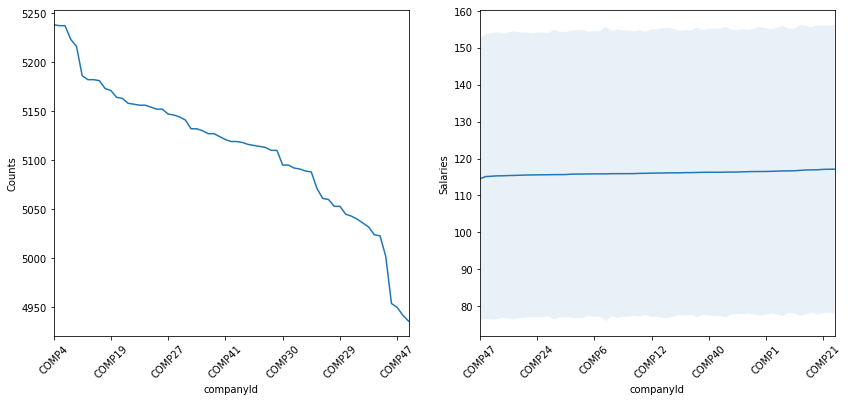

In [0]:
plot_feature(train_df, 'companyId')

**Here, it seems the correlation between salaries and companies is pretty weak.**

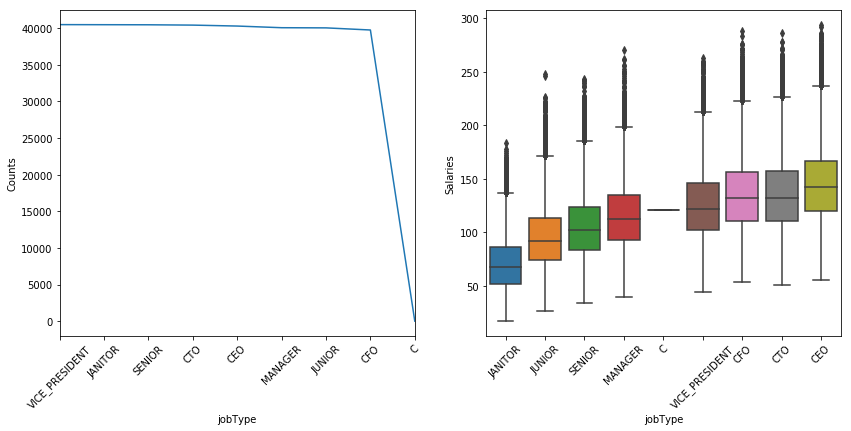

In [0]:
plot_feature(train_df, 'jobType')

**It's clear here that there is a correlation between job type and salaries. CEOs, CTOs and, CFOs earn the highest, while Janitors and people in junior positions earn less.**

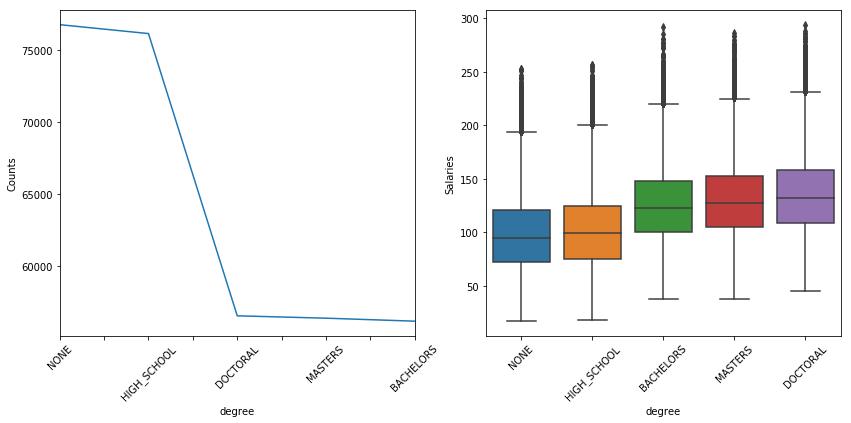

In [0]:
plot_feature(train_df, 'degree')

**It is shown here that a higher degree corresponds to a higher salary as well.**

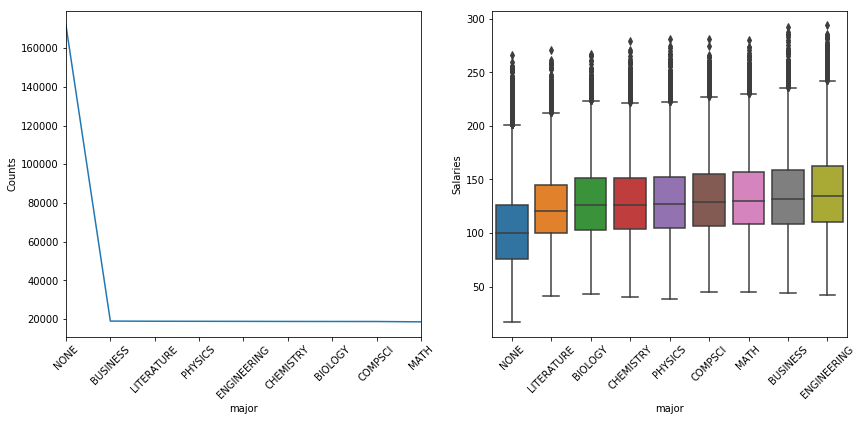

In [0]:
plot_feature(train_df, 'major')

**Here, it shows that people who majored in Math, Business and Engineering have the highest salaries. The lower end includes people who don't have college degrees, Biology and Chemistry majors.**

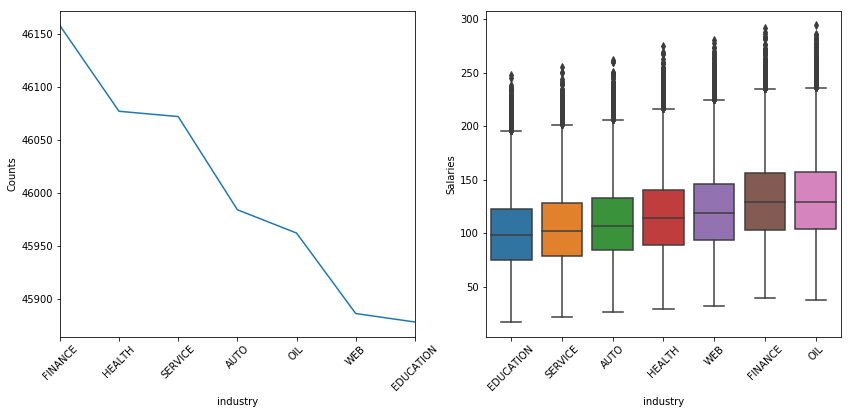

In [0]:
plot_feature(train_df, 'industry')

**As regards industries, the Finance and Oil industries have the highest salaries.**

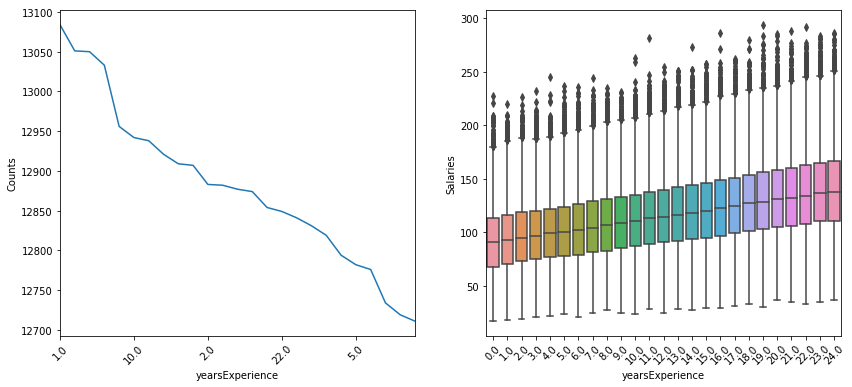

In [0]:
plot_feature(train_df, 'yearsExperience')

**This shows that the higher the years of experience, the higher the salary received.**

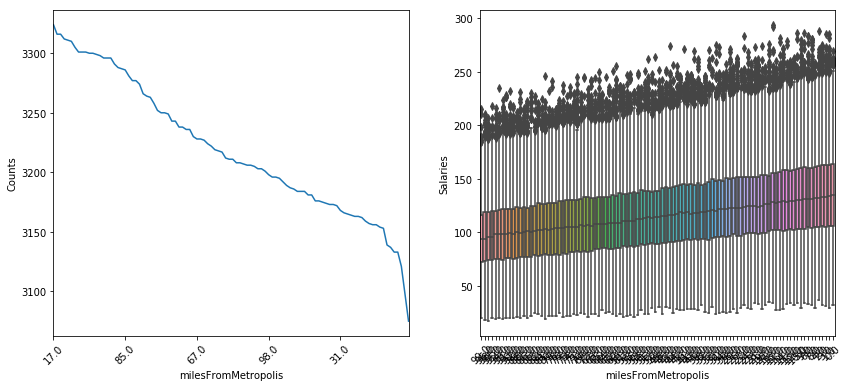

In [0]:
plot_feature(train_df, 'milesFromMetropolis')

**In general, we can see that the closer one is to a metropolis, the lower the salary.**

**Conclusion from EDA (Exploratory Data Analysis)**

It appears at this juncture that jobType is most strongly correlated with salary, followed by degree, major, and yearsExperience.

Among all the features, it's clear that degree and major have a strong degree of correlation and jobType has a moderate degree of correlation with both degree and major.